In [2]:
from pycoingecko import CoinGeckoAPI
from datetime import date
from datetime import time
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from PIL import Image

cg = CoinGeckoAPI()

In [3]:
now = datetime.now()
if now.minute >= 30:
    base = datetime.combine(date.today(),time(now.hour, 30))
    base = int(base.timestamp())-86400
else: 
    base = datetime.combine(date.today(),time(now.hour, 0))
    base = int(base.timestamp())-86400+1800

now = int(now.timestamp())

prices = cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp=base,to_timestamp=now)

In [4]:
x = []
y = []
for price in prices['prices']:
    x.append(price[0])
    y.append(price[1])

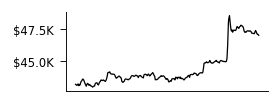

In [20]:
def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fK' % (x*1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize=(2, .8),dpi=130)
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis="y", labelsize=6.4, width =.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
plt.plot(x, y, color='black', linewidth='.7')
plt.xticks([])
plt.show()
fig.savefig('test.png',bbox_inches='tight')

In [21]:
def read_image(path):
    try:
        image = Image.open(path)
        return image
    except Exception as e:
        print(e)
    
image = read_image('test.png')

In [22]:
w, h = image.size

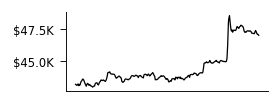

In [23]:
image

In [29]:
image.crop((13,9,w-17,h-15)).save('test.png')